## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# data = pd.read_csv('../data/processed_trips_2018.csv')
stations = pd.read_csv('../data/processed_stations_2018.csv')

In [8]:
# data.head()

In [9]:
stations.head()

station_id  station_latitude  station_longitude category
0       315.0         40.703554         -74.006702     both
1      3224.0         40.739974         -74.005139     both
2       386.0         40.714948         -74.002345     both
3       466.0         40.743954         -73.991449     both
4       438.0         40.727791         -73.985649     both

## Clustering

In [10]:
def plot_station_clusters(df):
    n_clusters = len(set(df["station_cluster"]))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=df, x='station_longitude', y='station_latitude', hue='station_cluster', palette='tab20', ax=ax)
    ax.set_title(f'Station Clusters (n={n_clusters})')


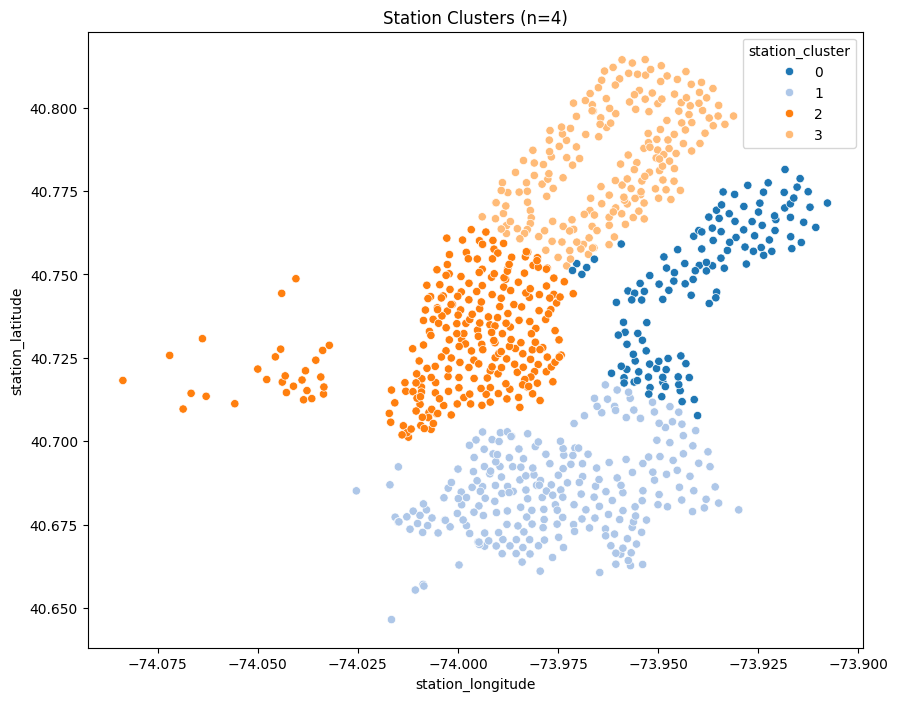

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(stations[['station_latitude', 'station_longitude']])
stations['station_cluster'] = kmeans.labels_
plot_station_clusters(stations)

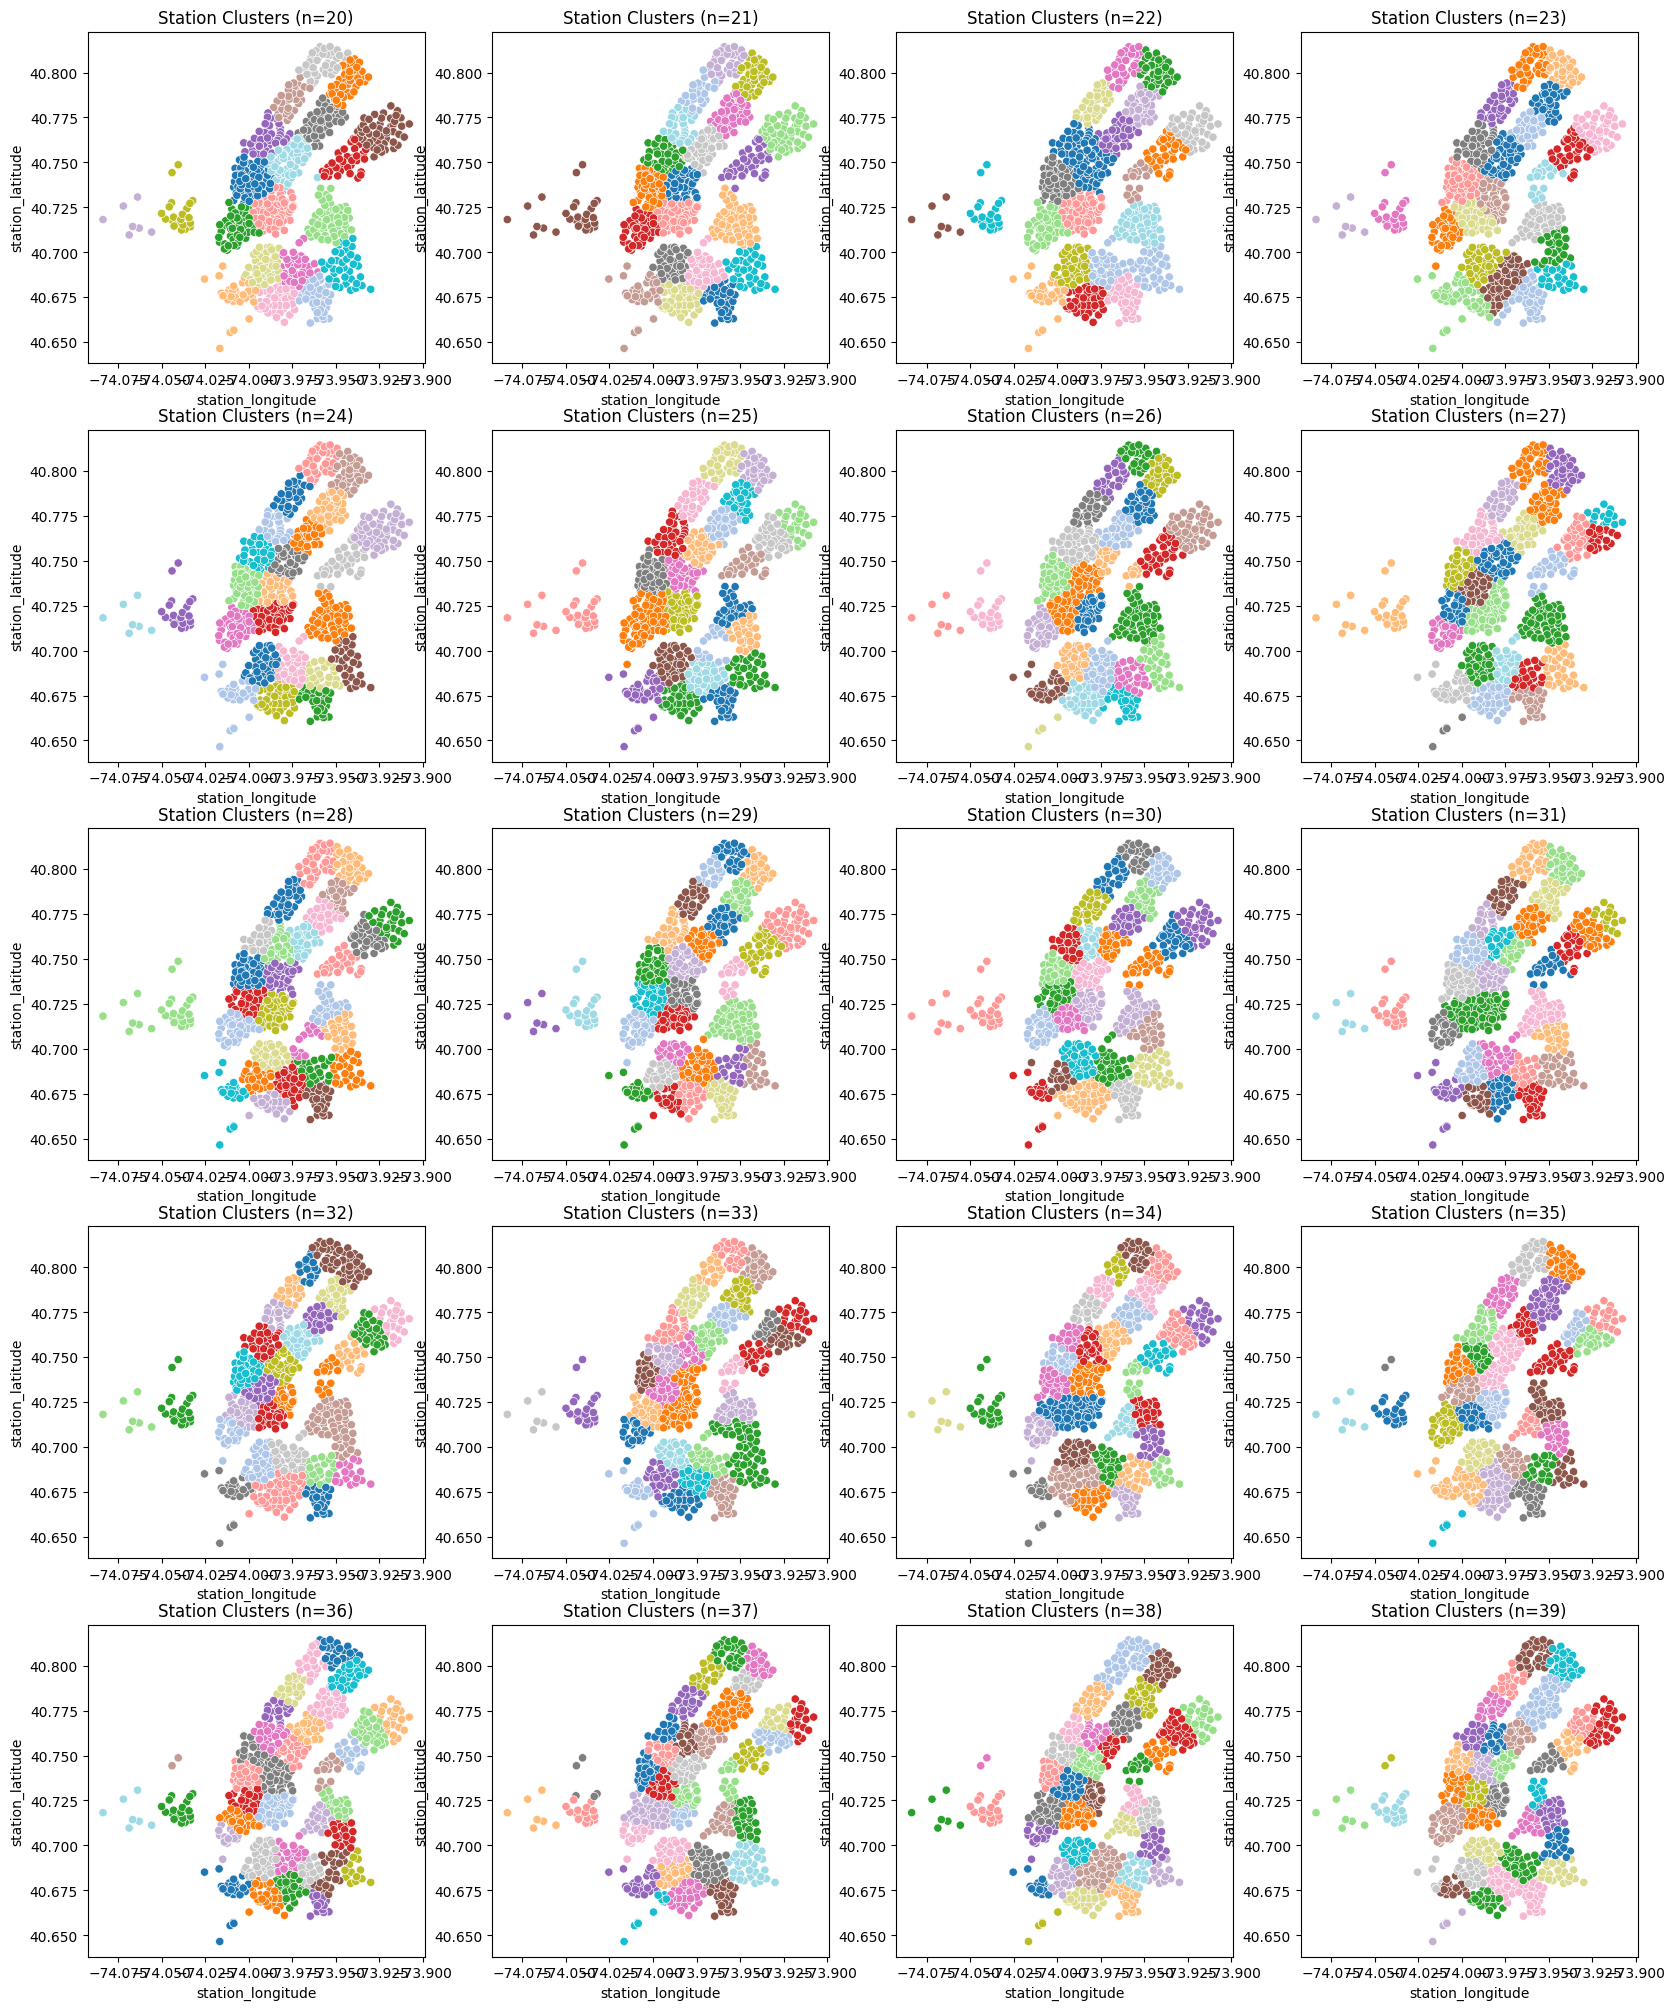

In [12]:
from sklearn.cluster import KMeans


# plot k means for up to 20 clusters
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters+19)
    kmeans.fit(stations[['station_latitude', 'station_longitude']])
    stations['station_cluster'] = kmeans.labels_
    sns.scatterplot(data=stations, x='station_longitude', y='station_latitude', legend=False, hue='station_cluster', palette='tab20', ax=ax[(n_clusters-1)//4, (n_clusters-1)%4])
    ax[(n_clusters-1)//4, (n_clusters-1)%4].set_title(f'Station Clusters (n={n_clusters+19})')

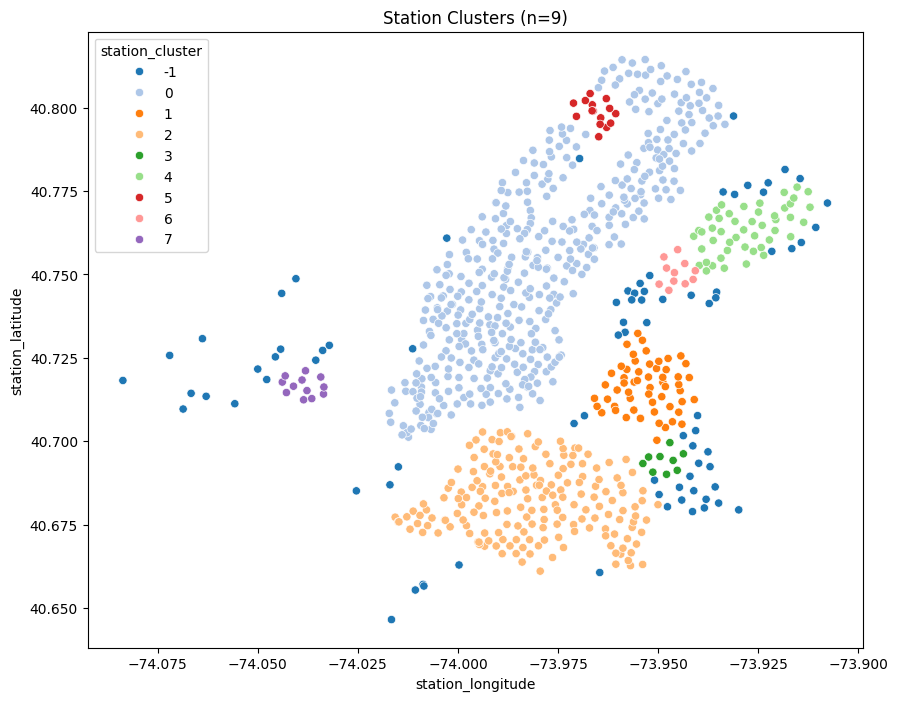

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.006, min_samples=10)
dbscan.fit(stations[['station_latitude', 'station_longitude']])
stations['station_cluster'] = dbscan.labels_
plot_station_clusters(stations)

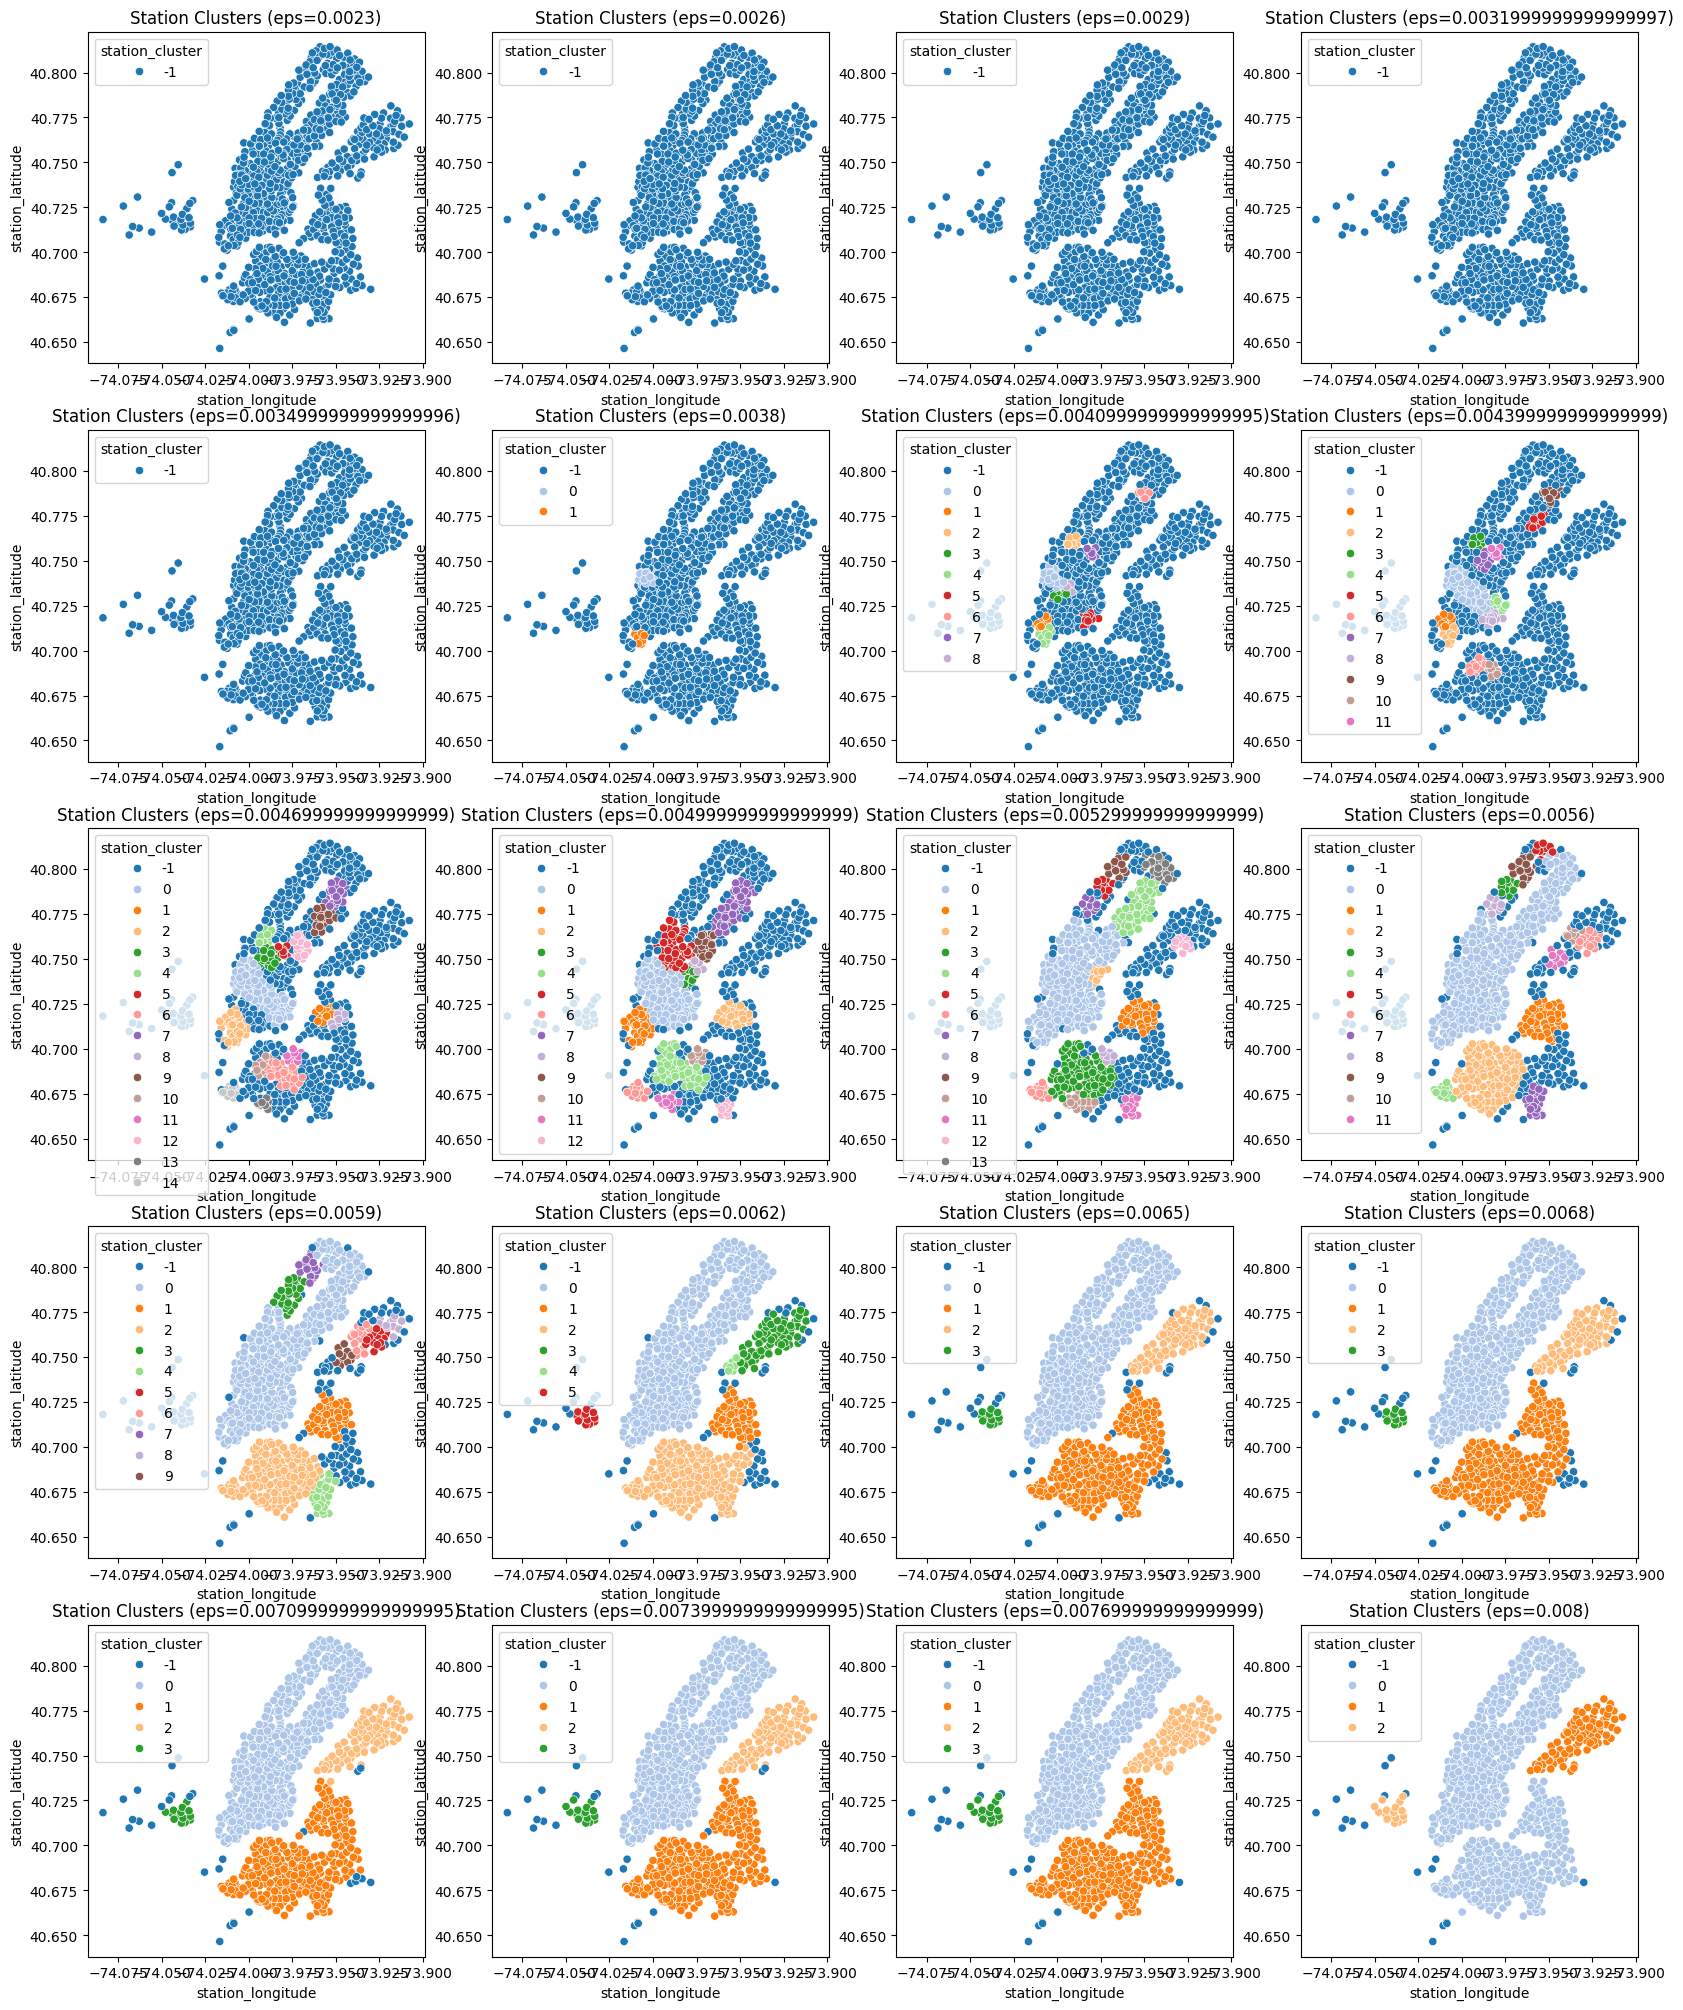

In [14]:
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for i in range(1, 21):
    eps = 0.002+0.0003*i
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(stations[['station_latitude', 'station_longitude']])
    stations['station_cluster'] = dbscan.labels_
    sns.scatterplot(data=stations, x='station_longitude', y='station_latitude', legend="full", hue='station_cluster', palette='tab20', ax=ax[(i-1)//4, (i-1)%4])
    ax[(i-1)//4, (i-1)%4].set_title(f'Station Clusters (eps={eps})')

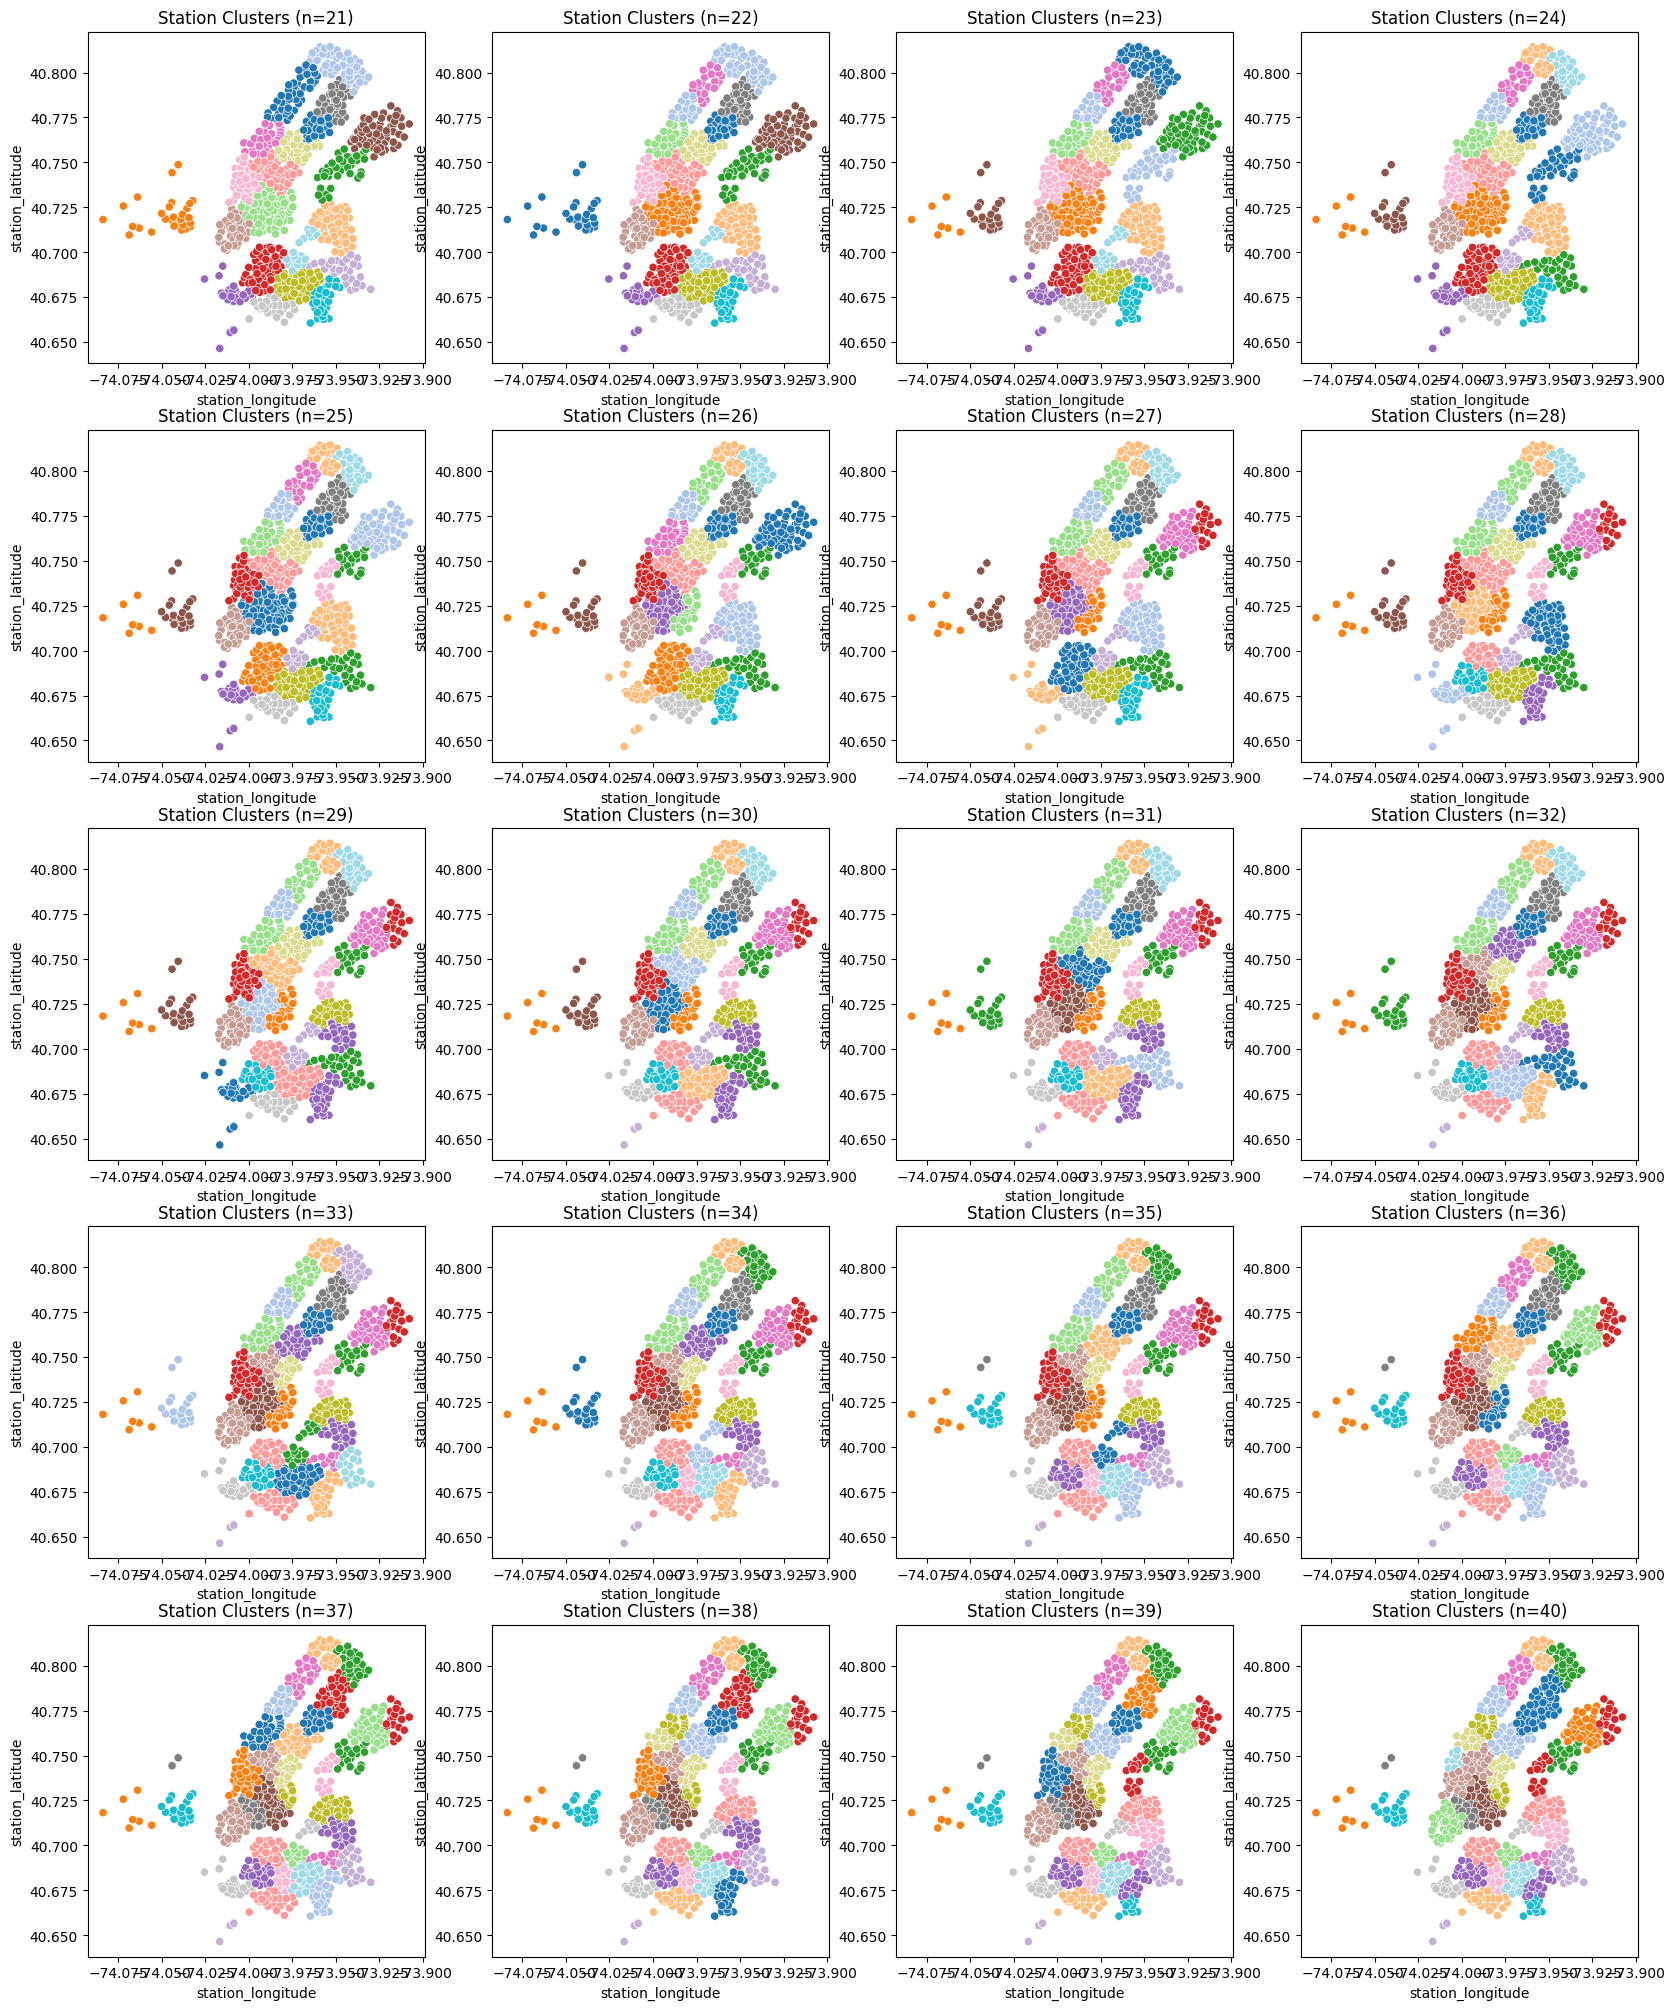

In [16]:
from sklearn.cluster import AgglomerativeClustering

# plot k means for up to 20 clusters
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for n_clusters in range(1, 21):
    agglo = AgglomerativeClustering(n_clusters=n_clusters+20)
    agglo.fit(stations[['station_latitude', 'station_longitude']])
    stations['station_cluster'] = agglo.labels_
    sns.scatterplot(data=stations, x='station_longitude', y='station_latitude', legend=False, hue='station_cluster', palette='tab20', ax=ax[(n_clusters-1)//4, (n_clusters-1)%4])
    ax[(n_clusters-1)//4, (n_clusters-1)%4].set_title(f'Station Clusters (n={n_clusters+20})')